In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu Feb 15 15:46:48 2024

@author: hp
"""
# import pandas as pd
# import multiprocessing
import numpy as np
import matplotlib.pyplot as plt
# from numba import jit
# import csv
import time
# import os
# import math
# from scipy.optimize import minimize
# from scipy.optimize import Bounds
import logging
# from datetime import datetime
import networkx as nx
from Spreading import SISModel,CPModel
import generate_networks
from Reconstruct import reconstruction
# from multiprocessing import Pool
from evaluate_accuracy import SRAC,SREL,SRNC,CR
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)



    
#     # 参数设置  
n_nodes = 500
p = 0.04
time_steps = 30
num_simulations = 5000
n0 = 10

# 1 init ER for each time step.
print("generate network start----------")
# print("nodes number:",n_nodes)
print("time steps:",time_steps)
spread_time0 = time.time()

network = generate_networks.DynamicNetwork(n_nodes, p,'ER','Random')
network.evolve(time_steps)

# network = generate_networks.Real_DynamicNetwork('email-Eu-core-temporal-Dept3.txt')
spread_time1 = time.time()
print("generating dynamic networks cost(s):",spread_time1-spread_time0)

# G = nx.read_gexf('path_to_file.gexf')

# 2 spread
# print("simulate spreading process start-------")
spread_time0 = time.time()

model = SISModel(network,time_steps,num_simulations,n0=n0)
# model = CPModel(network,time_steps,num_simulations,n0=n0)
model.simulate()

spread_time1 = time.time()
print("spreading simulated time(s):",spread_time1-spread_time0)
# print("simulate spreading process finished-------")



generate network start----------
time steps: 30
generating dynamic networks cost(s): 1.0164804458618164
spreading simulated time(s): 509.05579352378845


reconstruct T= 25
SIS dynamics


SolverError: Solver 'ECOS' failed. Try another solver, or solve with verbose=True for more information.

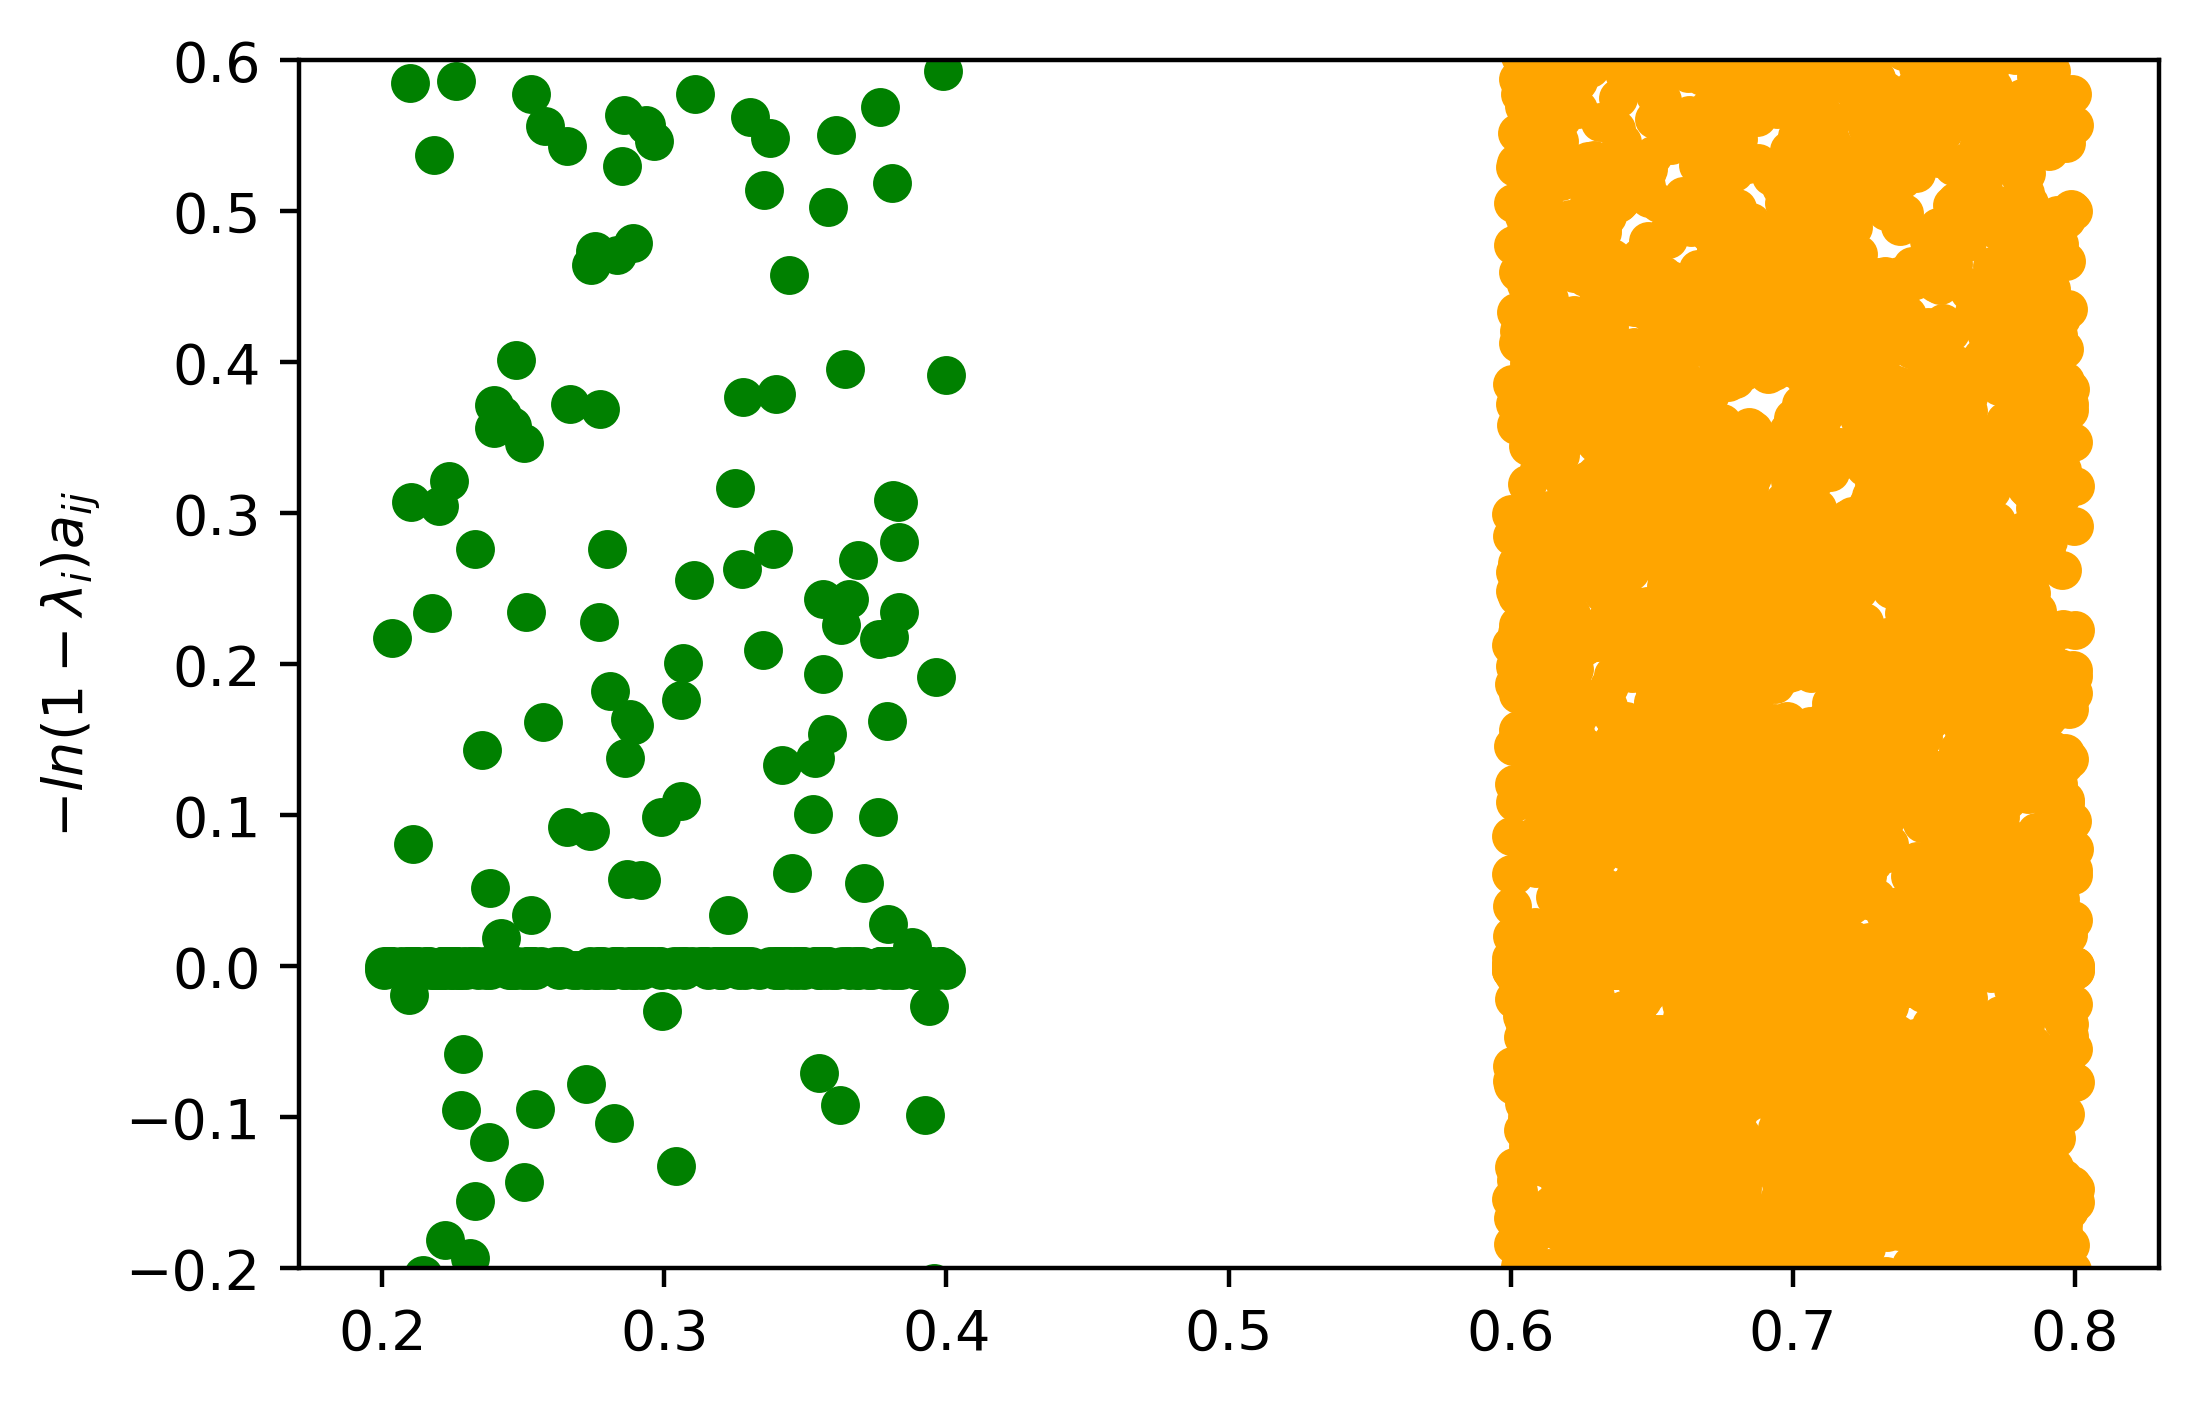

In [4]:
# 3 reconstruct
# print("reconstruct strat-----------")
choose_time = 25
print("reconstruct T=",choose_time)
reconstruct_time0 = time.time()

G_reconstruct = reconstruction(model,choose_time)

# print("reconstruct_nodes number:",G_reconstruct.number_of_nodes())
# print("reconstruct_edges number:",G_reconstruct.number_of_edges())
reconstruct_time1 = time.time()
# print("reconstruct simulated time(hr):",(reconstruct_time1-reconstruct_time0)/3600)
## save
G = network.graph_history[choose_time]
nx.write_adjlist(G, "G.adjlist")
nx.write_adjlist(G_reconstruct, "G_reconstruct.adjlist")
    

In [ ]:
# 4 visual
# 对比...图,邻接矩阵
fig = plt.figure(figsize=(8,8),dpi=400)
ax1 = fig.add_subplot(2,2,1)
nx.draw_networkx(G,pos = nx.spring_layout(G,seed=11),with_labels = False,arrows=None,node_size=20,node_color="tab:red",edge_color="tab:gray")
ax1.set_title('G_origin')

ax2 = fig.add_subplot(2,2,2)
nx.draw_networkx(G_reconstruct, pos=nx.spring_layout(G_reconstruct,seed=11),with_labels = False,arrows=None,node_size=20,node_color="tab:blue",edge_color="tab:gray")
ax2.set_title('G_reconstructed')

ax3 = fig.add_subplot(2,2,3)
ax3.matshow(nx.to_numpy_matrix(G),cmap=plt.cm.gray)

ax4 = fig.add_subplot(2,2,4)
ax4.matshow(nx.to_numpy_matrix(G_reconstruct),cmap=plt.cm.gray)

plt.show()


# 计算度分布  
degree_G0 = nx.degree(G)  
degree_G1 = nx.degree(G_reconstruct)  

# 计算聚类系数分布  
clustering_G0 = nx.clustering(G)  
clustering_G1 = nx.clustering(G_reconstruct)  

# 计算介数中心性  
betweenness_G0 = nx.betweenness_centrality(G)  
betweenness_G1 = nx.betweenness_centrality(G_reconstruct)  

# 计算接近中心性  
closeness_G0 = nx.closeness_centrality(G)  
closeness_G1 = nx.closeness_centrality(G_reconstruct)  


# 绘制度分布图  
plt.figure(figsize=(12, 12))  

# 度分布
plt.subplot(4, 1, 1)
degree_dist_G0 = [degree for node, degree in degree_G0]
degree_dist_G1 = [degree for node, degree in degree_G1]
plt.hist(degree_dist_G0, bins=np.arange(max(degree_dist_G0)+2)-0.5, alpha=0.5, color='b', label='G')
plt.hist(degree_dist_G1, bins=np.arange(max(degree_dist_G1)+2)-0.5, alpha=0.5, color='r', label='G_reconstruct')
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend()
# 聚类系数分布图
plt.subplot(4, 1, 2)
plt.hist(list(clustering_G0.values()), bins=20, alpha=0.5, color='b', label='G_origin')
plt.hist(list(clustering_G1.values()), bins=20, alpha=0.5, color='r', label='G_reconstruct')
plt.title('Clustering Coefficient Distribution')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')
plt.legend()
# 介数中心性分布图
plt.subplot(4, 1, 3)
plt.hist(list(betweenness_G0.values()), bins=20, alpha=0.5, color='b', label='G_origin')
plt.hist(list(betweenness_G1.values()), bins=20, alpha=0.5, color='r', label='G_reconstruct')
plt.title('Betweenness Centrality Distribution')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')
plt.legend()
# 接近中心性分布图  
plt.subplot(4, 1, 4)
plt.hist(list(closeness_G0.values()), bins=20, alpha=0.5, color='b', label='G_origin')
plt.hist(list(closeness_G1.values()), bins=20, alpha=0.5, color='r', label='G_reconstruct')
plt.title('Closeness Centrality Distribution')
plt.xlabel('Closeness Centrality')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()  
plt.show()

# 5 Assess accuracy
# G = nx.read_adjlist("G.adjlist")
# G_reconstruct = nx.read_adjlist("G_reconstruct.adjlist")
G_matrix = nx.to_numpy_matrix(G)
G_reconstruct_matrix = nx.to_numpy_matrix(G_reconstruct)
print("reconstruct simulated time(hr):",(reconstruct_time1-reconstruct_time0)/3600)
print("SRAC:",SRAC(G_matrix,G_reconstruct_matrix))
print("SREL:",SREL(G_matrix,G_reconstruct_matrix))
print("SRNC:",SRNC(G_matrix,G_reconstruct_matrix))
print("CR:",CR(G_reconstruct_matrix))